In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
df = pd.read_table('data/facemasks.tsv').drop_duplicates()
df.set_index('id', verify_integrity=True, inplace=True)

In [4]:
df.head()

,abuseCount,customerNickname,helpfulNo,helpfulYes,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,...,reviewed,score,languageCode.1,translation.reviewText,translation.reviewTitle,product_name,material,n_masks,brand,product_price
id,,,,,,,,,,,,,,,,,,,,,
05c2b17e-c28d-4792-930d-27e787d8d4ad,0,iHerb Customer,0,6,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,34.0,...,True,1.614071e+09,en-US,NaN,NaN,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85
80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,iHerb Customer,0,0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,37.0,...,False,1.612659e+09,ru-RU,The grandson really liked it. Comfortable mask.,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85
9a76e047-21e4-4da3-8b50-9d2396519b6b,0,iHerb Customer,0,0,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,3.0,...,False,1.612648e+09,en-US,NaN,NaN,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85
2890ac54-8707-418e-be3e-8d46231e3672,0,InnaIgorevna,0,0,0,ru-RU,2021-02-05T16:29:28.906Z,103839,0.0,16.0,...,False,1.612543e+09,ru-RU,A thin mask that is pleasant to the body. I li...,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85
9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,iHerb Customer,0,0,0,ru-RU,2021-02-05T09:43:42.367Z,103839,0.0,19.0,...,False,1.612518e+09,ru-RU,Great mask! It suited me perfectly. There is a...,en-US,"Lozperi, Copper Mask, Adult, Dot, 1 Count",copper,1,Lozperi,6.85


In [5]:
df['postedDate'] = pd.to_datetime(df['postedDate'])
df['dayofweek'] = df['postedDate'].dt.dayofweek
df['hour'] = df['postedDate'].dt.hour

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
num_cols = ['dayofweek', 'hour', 'profileInfo.ugcSummary.answerCount', 'profileInfo.ugcSummary.reviewCount']
cat_cols = ['languageCode']
xNum = df[num_cols]
scaler = StandardScaler()
xScaled = scaler.fit_transform(xNum[['profileInfo.ugcSummary.answerCount', 'profileInfo.ugcSummary.reviewCount']])
xScaled = pd.DataFrame(xScaled, columns=['profileInfo.ugcSummary.answerCount', 'profileInfo.ugcSummary.reviewCount'],
                       index=df.index)
xCat = pd.get_dummies(df['languageCode'])

In [8]:
X = pd.concat((xNum.drop(['profileInfo.ugcSummary.answerCount', 'profileInfo.ugcSummary.reviewCount'], axis=1), xScaled, xCat), axis=1).dropna()

In [9]:
from tqdm import tqdm

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.45it/s]


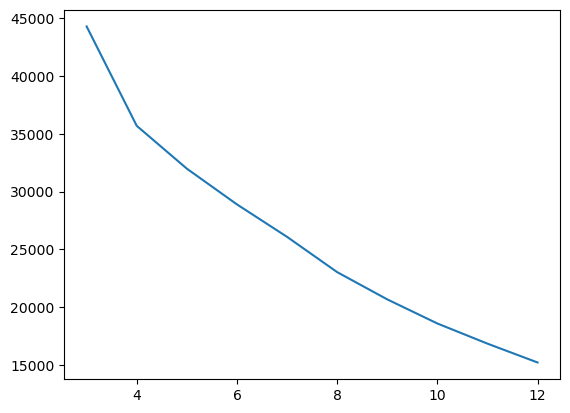

In [10]:
inertia = []
for i in tqdm(range(3, 13)):
    km = KMeans(n_clusters=i).fit(X)
    inertia.append(km.inertia_)

plt.plot(range(3, 13), inertia)

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
xred = tsne.fit_transform(X)

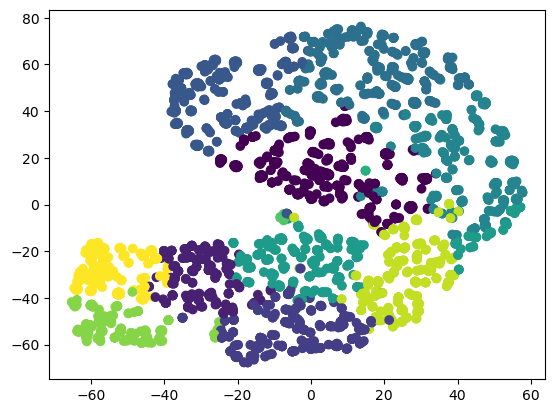

In [14]:
plt.scatter(*xred.T, c=km.labels_)

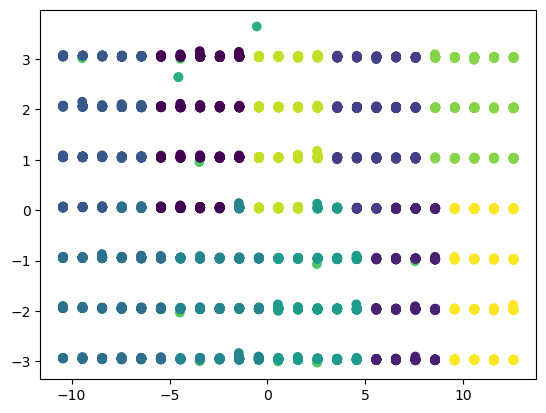

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xred_pca = pca.fit_transform(X)

plt.scatter(*xred_pca.T, c=km.labels_)

In [19]:
X['label'] = km.labels_

In [22]:
X['ratingValue'] = df['ratingValue']

In [34]:
X['helpfulYes'] = df['helpfulYes']
X['helpfulNo'] = df['helpfulNo']
X['brand'] = df['brand']

<AxesSubplot:xlabel='label', ylabel='brand'>

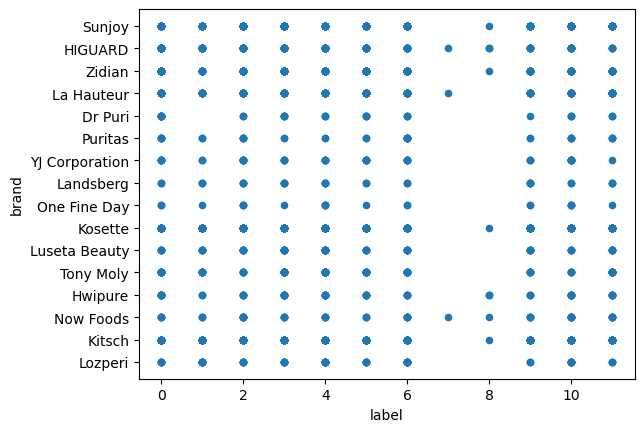

In [36]:
X.plot.scatter(x='label', y='brand')

<AxesSubplot:xlabel='hour', ylabel='ratingValue'>

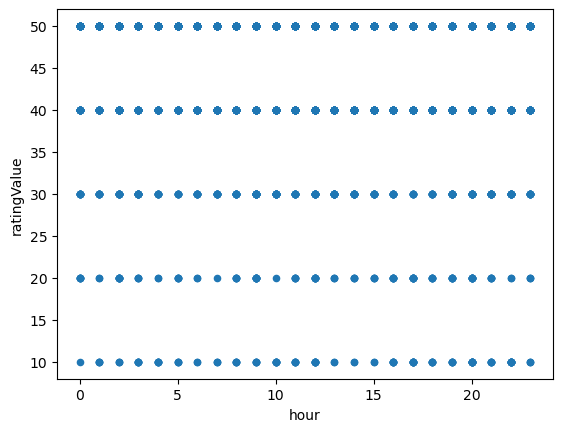

In [30]:
X.plot.scatter(x='hour', y='ratingValue')

In [28]:
X[X['label'] == 3]

,dayofweek,hour,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ar-SA,de-DE,en-US,es-MX,fr-FR,he-IL,ja-JP,ko-KR,pt-BR,ru-RU,zh-CN,zh-TW,label,ratingValue,helpfulYes,helpfulNo
id,,,,,,,,,,,,,,,,,,,,
9a76e047-21e4-4da3-8b50-9d2396519b6b,5,21,-0.132726,-0.291832,0,0,1,0,0,0,0,0,0,0,0,0,3,40,0,0
04b1571e-2077-4a17-8385-de438b9e255f,6,20,-0.132726,0.145912,0,0,1,0,0,0,0,0,0,0,0,0,3,30,0,0
9f012e7f-5a81-4ebe-9907-5024bbcd49a5,6,20,-0.132726,-0.284285,0,0,0,0,0,1,0,0,0,0,0,0,3,10,0,0
26ff339b-a70d-471c-afe6-49b29fd56964,4,20,-0.132726,-0.201265,0,0,0,0,0,1,0,0,0,0,0,0,3,50,0,0
3c4f1a5a-e8c1-4c84-9b7e-dda301683fcc,3,21,-0.132726,-0.276738,0,0,0,0,0,0,1,0,0,0,0,0,3,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d2d3deb1-515a-4253-b018-2bcdda70499d,6,23,-0.132726,0.089307,0,0,0,0,0,0,1,0,0,0,0,0,3,40,1,0
f3fab85b-3d81-4917-acc1-0aec1005df13,4,23,-0.132726,-0.280511,0,0,1,0,0,0,0,0,0,0,0,0,3,50,0,0
69d04784-3d59-41db-b7df-43be7aee678a,3,22,-0.132726,-0.299380,0,0,1,0,0,0,0,0,0,0,0,0,3,30,0,0


In [10]:
X['label'] = km.labels_

In [11]:
X['label'].value_counts()

5     481
1     437
4     415
2     409
3     401
6     383
11    350
0     314
7     306
8     249
9      11
10      3
Name: label, dtype: int64

In [13]:
df['label_id'] = X['label']

In [14]:
df.to_csv('data/clustered.tsv', sep='\t')

In [114]:
clus = X.index[X['label'] == 8]
clus = df.loc[clus][num_cols + cat_cols]
clus

,dayofweek,hour,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,languageCode
id,,,,,
34d18036-f158-413c-ae1f-0f6eb37fc96b,0,16,355.0,246.0,ru-RU
e9884291-6c59-4e42-8129-d1d7036fc40a,0,12,282.0,108.0,ru-RU
4b7f0287-22b4-4562-bf30-f8c6a048fc90,0,10,396.0,119.0,ru-RU
f9cb0c7f-1eae-4ea1-9961-f22e9cfae7ff,4,16,373.0,318.0,ru-RU
17c005d6-5d08-4785-9780-4c19687f6ab1,1,17,589.0,113.0,ar-SA
df7fbe52-25ca-48d9-a3ce-ae563424a3a8,2,10,673.0,18.0,ru-RU
956ffa6c-54dc-4958-a40c-6fa21bfa56da,1,12,213.0,51.0,ru-RU
bd73764e-f4dc-4889-ae07-1c8464127e37,4,16,648.0,158.0,ru-RU
66fae4b5-4646-4437-b60c-4cd84d3cd6fb,0,10,396.0,119.0,ru-RU


In [87]:
clus = X.index[X['label'] == 5]
clus = df.loc[clus][num_cols + cat_cols]
clus.sample(10)

,dayofweek,hour,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,languageCode
id,,,,,
07297bb1-cc5d-4eb9-be03-3d9558944848,4,21,0.0,2.0,en-US
305c6dad-9c5e-473e-b272-50647f8c9b0a,2,17,0.0,12.0,he-IL
c6e83794-60f2-46e5-b749-9a097ddafdda,5,19,1.0,12.0,ru-RU
2b239cd9-af4d-4a2d-b6b2-f88e31f82289,4,16,1.0,22.0,en-US
70ce8433-8d60-45ac-9c0d-7ff76b92d5bd,1,9,0.0,6.0,en-US
a5766f37-fee4-4d92-89b1-cf1fca7bd8c9,1,19,0.0,13.0,en-US
d8bfb08d-13a4-49f3-8fb6-4cb5f3b0da5e,2,23,0.0,6.0,ar-SA
162fa0f5-3eac-49e9-a810-54248762b09a,4,3,0.0,1.0,en-US
496b3748-e703-4859-92ac-5963be08b226,4,7,1.0,16.0,en-US
